# Week 11: Web APIs - NYT Top Stories

By Daniela Porras IS362

In this notebook, I will use the New York Times Top tories API to retrieve current articles from a specific section of the website (e.g., "science", "world", or "home"). Using Python, we'll send a request to the API, read the JSON response, and explore key information like article titles, publication dates, and sections. This assignment demonstrates how APIs allow us to fetch live data from the web and use it for analysis.

# Step 1 - Import Required Libraries

In [1]:
import requests
import pandas as pd

# Step 2: Request Data from the NYT API 

In this step, we will connect to the New York Times Top Stories API to request article data for a specific news section (in this case, the science section).

We start by defining the API key, which gives us authorized access to the NYT API. Then, we build a URL using that API key and the section we want to query. Using the requests library, we send a GET request to the API and retrieve the data in JSON format.

This step allows us to fetch real-time news content directly from the New York Times, which we can analyze or visualize later in the notebook.

In [3]:
# Request Data from NYT Top Stories API
api_key = "GGBVHCi14efGUIXFGSAcWcFGhglJXbGd" 
section = "science" 
url = f"https://api.nytimes.com/svc/topstories/v2/{section}.json?api-key={api_key}"

# Make the request
response = requests.get(url)
data = response.json()

# Step 3: Inspecting and Exploring the NYT Top Stories Data

Now that I've successfully made a request to the New York Times Top Stories API and received a response, I'll inspect the JSON data structure to understand what kind of information is available. This step helps identify what fields (like title, abstract, URL, published date, etc.) I might want to extract for further analysis or visualization.

In [4]:
# Check the keys in the JSON response
data.keys()

dict_keys(['status', 'copyright', 'section', 'last_updated', 'num_results', 'results'])

In [5]:
# Look at the structure of the first article
data['results'][0]

{'section': 'science',
 'subsection': '',
 'title': 'Sign Up for the Science Times Newsletter',
 'abstract': 'Every week, we’ll bring you stories that capture the wonders of the human body, nature and the cosmos.',
 'url': 'null',
 'uri': 'nyt://embeddedinteractive/daba9d03-29b8-5cfc-8cbd-74b8abf54a07',
 'byline': '',
 'item_type': 'EmbeddedInteractive',
 'updated_date': '2018-04-07T13:23:25-04:00',
 'created_date': '2016-02-05T18:18:53-05:00',
 'published_date': '2016-02-05T18:18:53-05:00',
 'material_type_facet': '',
 'kicker': '',
 'des_facet': [],
 'org_facet': [],
 'per_facet': [],
 'geo_facet': [],
 'multimedia': [{'url': 'https://static01.nyt.com/images/2016/02/06/science/sciencenewsletter2/sciencenewsletter2-superJumbo.jpg',
   'format': 'Super Jumbo',
   'height': 1534,
   'width': 2048,
   'type': 'image',
   'subtype': 'photo',
   'caption': '',
   'copyright': 'NASA, via Associated Press'},
  {'url': 'https://static01.nyt.com/images/2016/02/06/science/sciencenewsletter2/sci

# Step 4: Extract and Clean the Data

In this step, I extracted the relevant pieces of information from the JSON response returned by the New York Times Top Stories API. Specifically, I selected the article's title, abstract, URL, byline, and published date. These fields provide a clear snapshot of each article and are useful for summarizing or analyzing the top stories.

I looped through the results list in the JSON data and created a new list of dictionaries containing only the fields I wanted. This helps keep the dataset clean and focused for further analysis or display.

In [6]:
# Create a DataFrame from the 'results' list
articles = pd.json_normalize(data['results'])

# Select and rename columns of interest
cleaned_articles = articles[[
    'section',
    'title',
    'abstract',
    'url',
    'byline',
    'published_date',
    'multimedia'
]]

# Check the first few rows
cleaned_articles.head()

,section,title,abstract,url,byline,published_date,multimedia
0,science,Sign Up for the Science Times Newsletter,"Every week, we’ll bring you stories that captu...",null,,2016-02-05T18:18:53-05:00,[{'url': 'https://static01.nyt.com/images/2016...
1,admin,,,,,2015-04-16T14:13:18-04:00,None
2,health,"Medicare Bleeds Billions on Pricey Bandages, a...",Medicare spending on “skin substitutes” made o...,https://www.nytimes.com/2025/04/10/health/skin...,By Sarah Kliff and Katie Thomas,2025-04-10T11:58:45-04:00,[{'url': 'https://static01.nyt.com/images/2025...
3,health,‘The Pitt’ Captures the Real Overcrowding Cris...,"From the “chairs” to the hallway medicine, the...",https://www.nytimes.com/2025/04/10/health/the-...,By Gina Kolata,2025-04-10T09:46:56-04:00,[{'url': 'https://static01.nyt.com/images/2025...
4,health,Kennedy Offers Qualified Support for Measles V...,"In an interview with CBS, the health secretary...",https://www.nytimes.com/2025/04/09/health/kenn...,By Teddy Rosenbluth,2025-04-09T20:46:11-04:00,[{'url': 'https://static01.nyt.com/images/2025...


# Step 5: Create a DataFrame

In this step, I will convert the cleaned and extracted data into a structured pandas DataFrame. This format allows for easy analysis and visualization of the articles, making it simpler to explore patterns like article titles, their publish dates, and associated multimedia.

In [9]:
# Convert the extracted article data to a pandas DataFrame
df = pd.DataFrame(articles)

# Preview the DataFrame
df.head()


,section,subsection,title,abstract,url,uri,byline,item_type,updated_date,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,science,,Sign Up for the Science Times Newsletter,"Every week, we’ll bring you stories that captu...",null,nyt://embeddedinteractive/daba9d03-29b8-5cfc-8...,,EmbeddedInteractive,2018-04-07T13:23:25-04:00,2016-02-05T18:18:53-05:00,2016-02-05T18:18:53-05:00,,,[],[],[],[],[{'url': 'https://static01.nyt.com/images/2016...,
1,admin,,,,,nyt://embeddedinteractive/6cb185ed-65ac-50a5-a...,,EmbeddedInteractive,2015-07-20T13:45:03-04:00,2015-04-16T14:13:18-04:00,2015-04-16T14:13:18-04:00,,,[],[],[],[],None,
2,health,,"Medicare Bleeds Billions on Pricey Bandages, a...",Medicare spending on “skin substitutes” made o...,https://www.nytimes.com/2025/04/10/health/skin...,nyt://article/0f268249-b960-590b-95fc-ce7ab5f0...,By Sarah Kliff and Katie Thomas,Article,2025-04-10T16:29:46-04:00,2025-04-10T11:58:45-04:00,2025-04-10T11:58:45-04:00,,,"[United States Politics and Government, Prices...",[],[],[],[{'url': 'https://static01.nyt.com/images/2025...,
3,health,,‘The Pitt’ Captures the Real Overcrowding Cris...,"From the “chairs” to the hallway medicine, the...",https://www.nytimes.com/2025/04/10/health/the-...,nyt://article/3d710fe5-0ddc-5739-87c7-9536f332...,By Gina Kolata,Article,2025-04-10T13:14:30-04:00,2025-04-10T09:46:56-04:00,2025-04-10T09:46:56-04:00,,,"[The Pitt (TV Program), Emergency Medical Trea...",[],[],[],[{'url': 'https://static01.nyt.com/images/2025...,
4,health,,Kennedy Offers Qualified Support for Measles V...,"In an interview with CBS, the health secretary...",https://www.nytimes.com/2025/04/09/health/kenn...,nyt://article/ef0ebb36-f4c9-52aa-bff7-fa054eb5...,By Teddy Rosenbluth,Article,2025-04-10T22:00:31-04:00,2025-04-09T20:46:11-04:00,2025-04-09T20:46:11-04:00,,,"[your-feed-science, Measles, Rumors and Misinf...","[CBS News, Health and Human Services Department]",[],[],[{'url': 'https://static01.nyt.com/images/2025...,


# Step 6: Visual Analysis

In this step, I perform additional visual analysis using the article data from the New York Times Top Stories API. These visualizations help better understand the content and timing of the published articles.


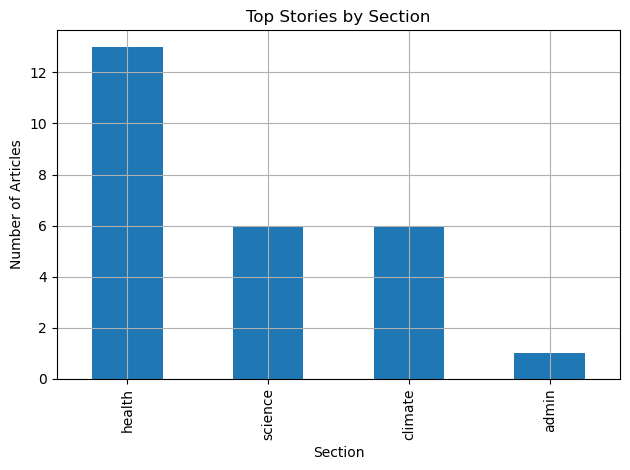

In [19]:
# Count articles by section
df['section'].value_counts().plot(kind='bar', title='Top Stories by Section', xlabel='Section', ylabel='Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


In this step, I performed a visual analysis by counting and plotting the number of articles in each section using the article data from the New York Times Top Stories API.

The bar chart titled "Top Stories by Section" shows the distribution of articles across various sections. From the visualization, it is clear that:

- The Health section has the highest number of articles, indicating a strong editorial focus on health-related topics at the time of data retrieval.

- The Science and Climate sections have a moderate presence, reflecting continued interest in environmental and scientific topics.

- The Admin section appears with minimal entries, which may be system-related or not actual news articles.

This type of chart is useful for quickly identifying which content areas are being prioritized or are most prominent in the current news cycle.

# Conclusion

In this assignment, I used the New York Times Top Stories API to fetch real-time articles from the science section. I explored the structure of the JSON response, extracted key fields, and transformed the data into a structured pandas DataFrame. I then visualized Top Stories by Section to identify which sections stood out based on number of articles in Top Stories. This assignment helped reinforce my understanding of working with APIs, parsing JSON data, and using pandas for exploratory analysis.
